# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.


In [7]:
#Dependencies and Setup
#Your environment may need to have pip installed seaborn, citipy, matplotlib, numpy, and others
#Imported more than needed to try different approaches
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import seaborn as sns #Did not use but want to for future improvements
import time
import random
import csv
import json
import openweathermapy.core as owm

###YOU NEED A KEY###
# Import API key for weathermap
#from api_keys import api_key
#or 
#api_key = "YOUR______KEY____HERE"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy as cp

#Output File (CSV), 
#saving for use later but can be moved down
output_data_file = "output_data/cities.csv"

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

#Given range of latitudes and longitudes
#lat_range = (-90, 90)
#lng_range = (-180, 180)

In [8]:
#Use random to find map coordinate list within suggested ranges
#I used size =  25, which is a low number, for speed and framing the script. 
#Change size to 60 for time limits of free api key, 1500 for paid key and patience, and better dataset
lats = np.random.uniform(low=-90.000, high=90.000, size=25)
lngs = np.random.uniform(low=-180.000, high=180.000, size=25)

#Create the coordinate pairs using zip
lat_lngs = zip(lats, lngs)

# Generate Cities List

In [9]:
#Generate a list of cities near the suggested map coordinate ranges
#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list. This drops duplicates
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

24

In [10]:
#Create dataframe
cities_df = pd.DataFrame(cities)
cities_df.columns = ['cities']
cities_df

#Loop through Dataframe
#Set base url and units
row_count = cities_df.count()
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Build partial query URL. The key is essential for this step.
query_url = f"{url}appid={api_key}&units={units}&q="

#Set list for suggested response results
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
MaxTemp = []
WindSpeed = []

In [11]:
#Use iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():
    row_count = 0
    
# Get city names from the dataframe
    city_name = row['cities']

# Assemble url and make API request
    print(f"Retrieving Results for Index {index}: {city_name}.")
    response = requests.get(query_url + city_name).json()
    time.sleep(1)
    
    try:
        print(f"Processing record {city_name}.")
        print(response)
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        MaxTemp.append(response['main']['temp_max'])
        WindSpeed.append(response['wind']['speed'])

      
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        
    print("------------")

#Did not get this to work. Sving for later.
#cities_df = pd.DataFrame(cities)
#cities_df["City Name"] = ""
#cities_df["Country Code"] = ""
#for index, row in cities_df.iterrows():
#    row["City Name"] = cities_df.iloc[index,0].city_name
#    row["Country Code"] = cities_df.iloc[index,0].country_code
#cities_df.head

Retrieving Results for Index 0: hilo.
Processing record hilo.
{'coord': {'lon': -155.08, 'lat': 19.71}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 73.04, 'pressure': 1020, 'humidity': 75, 'temp_min': 73.04, 'temp_max': 73.04}, 'visibility': 16093, 'wind': {'speed': 6.93, 'deg': 320}, 'clouds': {'all': 40}, 'dt': 1544331180, 'sys': {'type': 1, 'id': 7881, 'message': 0.0033, 'country': 'US', 'sunrise': 1544373823, 'sunset': 1544413325}, 'id': 5855927, 'name': 'Hilo', 'cod': 200}
------------
Retrieving Results for Index 1: vaini.
Processing record vaini.
{'coord': {'lon': 74.49, 'lat': 15.34}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 81.48, 'pressure': 1018, 'humidity': 51, 'temp_min': 80.6, 'temp_max': 82.4}, 'visibility': 6000, 'wind': {'speed': 5.82, 'deg': 110}, 'clouds': {'all': 0}, 'dt': 1544331600, 'sys': {'type':

Processing record rikitea.
{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 76.93, 'pressure': 1029.83, 'humidity': 100, 'temp_min': 76.93, 'temp_max': 76.93, 'sea_level': 1029.89, 'grnd_level': 1029.83}, 'wind': {'speed': 11.45, 'deg': 34.5039}, 'rain': {'3h': 0.66}, 'clouds': {'all': 56}, 'dt': 1544333028, 'sys': {'message': 0.0229, 'country': 'PF', 'sunrise': 1544364411, 'sunset': 1544413092}, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}
------------
Retrieving Results for Index 16: tasiilaq.
Processing record tasiilaq.
{'coord': {'lon': -37.64, 'lat': 65.61}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 19.4, 'pressure': 1014, 'humidity': 52, 'temp_min': 19.4, 'temp_max': 19.4}, 'wind': {'speed': 5.82, 'deg': 280}, 'clouds': {'all': 36}, 'dt': 1544331000, 'sys': {'type': 1, 'id': 8

In [12]:
cities_df.to_csv("selected_cities.csv", index=False)
#Output File (CSV)
#output_data_file = "resources/selected_cities.csv"

### Perform API Calls
* The above scroll was the performance of a weather check on each city using a series of successive API calls.
* Included a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Exported the city data into a .csv.
* Displayed the DataFrame

In [13]:
#Display in dataframe
weather_df = pd.DataFrame({'City': City,
                           'Cloudiness': Cloudiness,
                           'Country': Country, 
                           'Date': Date, 
                           "Humidity": Humidity, 
                           "Lat": Lat, 
                           "Lng": Lng, 
                           "Max Temp": MaxTemp, 
                           "Wind Speed": WindSpeed, })


weather_df.to_csv('cities.csv')
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hilo,40,US,1544331180,75,19.71,-155.08,73.04,6.93
1,Vaini,0,IN,1544331600,51,15.34,74.49,82.40,5.82
2,Warri,24,NG,1544333012,92,5.52,5.75,74.77,3.02
3,Saint-Philippe,20,CA,1544331600,84,45.36,-73.48,14.54,4.70
4,Cape Town,0,ZA,1544331600,68,-33.93,18.42,64.40,13.87
5,Albany,1,US,1544331420,73,42.65,-73.75,24.08,3.36
6,Port Alfred,88,ZA,1544333017,100,-33.59,26.89,63.29,5.93
7,Barrow,76,AR,1544333018,39,-38.31,-60.23,76.66,14.70
8,Puerto Ayora,36,EC,1544332811,100,-0.74,-90.35,71.84,8.05
9,Kutum,0,SD,1544333020,53,14.20,24.66,51.91,3.02


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

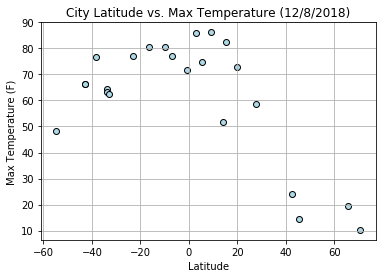

In [14]:
#Make a scatter plot with lightblue dots, grid, and other features
plt.scatter(Lat, MaxTemp, marker="o", facecolors ="lightblue", edgecolors = "black")
plt.grid(True)
plt.title("City Latitude vs. Max Temperature (12/8/2018)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

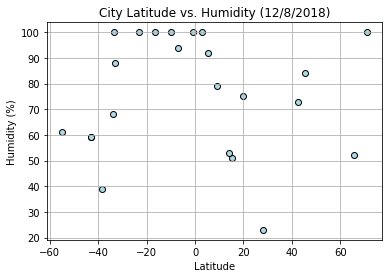

In [15]:
#Make scatter plot for humidity, same style
plt.scatter(Lat, Humidity, marker="o", facecolors ="lightblue", edgecolors = "black")
plt.grid(True)
plt.title("City Latitude vs. Humidity (12/8/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

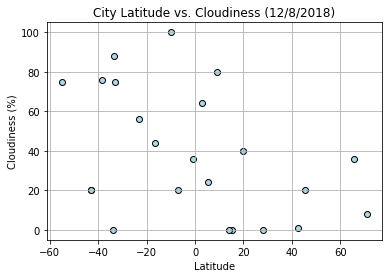

In [16]:
#Make a scatterplot for Cloudiness, same style
plt.scatter(Lat, Cloudiness, marker="o", facecolors ="lightblue", edgecolors = "black")
plt.grid(True)
plt.title("City Latitude vs. Cloudiness (12/8/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

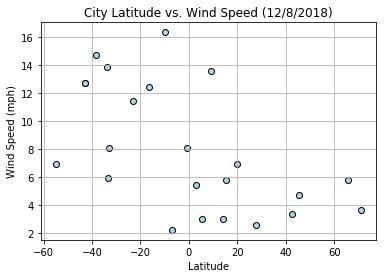

In [17]:
#Make a scatterplot for Windspeed, same style
plt.scatter(Lat, WindSpeed, marker="o", facecolors ="lightblue", edgecolors = "black")
plt.grid(True)
plt.title("City Latitude vs. Wind Speed (12/8/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.show